In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# Interpolación polinomial

Se puede interpolar un conjunto de datos o una función utilizando polinomios. _Interpolar_ significa encontrar el polinomio que pase por todos los puntos del conjunto de datos. Para esto, examinaremos dos técnicas para encontrar dichos polinomios. Dado un conjunto de $n$ puntos $(x_i,y_i)$ donde $x_i$ se llama _nodo_ y $y_i$ _valor_.

## Polinomios de Lagrange

Para calcular el polinomio de Lagrange, se debe primero construir la **base cardinal** o **base de Lagrange** de $n$ polinomios dados por 

$$l_i (x) = \prod_{0\leq k \leq n-1, k \neq i} \frac{x-x_k}{x_i-x_k}$$

A partir de este, el polinomio de Lagrange estará dado por 

$$L(x) = \sum_{i=0}^{n-1} y_i l_i(x)$$

A continuación, veamos un ejemplo de esto. Digamos que buscamos interpolar el conjunto de datos dado por

| $i$  | $x_i$ | $y_i$ |
|:-------:|:-------:|:-------:|
|    0    |    0    |    1    |
|    1    |    1    |   2.32  |
|   2   |   1.5   |   2.71  |
|    3    |    2    |   2.48  |
|    4    |    3    |   1.15  |
|    5    |    4    |   0.47  |

Para $i=2$, observemos que el polinomio de la base cardinal está dado por

$$l_2 (x) = \prod_{1\leq k \leq n-1, k \neq 2} \frac{x-x_k}{x_2-x_k} = \left( \frac{x-0}{1.5-0} \right) \left( \frac{x-1}{1.5-1} \right) \left( \frac{x-2}{1.5-2} \right) \left( \frac{x-3}{1.5-3} \right) \left( \frac{x-4}{1.5-4} \right)$$

$$l_2 (x) = \frac{x}{1.5}\frac{x-1}{0.5}\frac{x-2}{-0.5}\frac{x-3}{-1.5}\frac{x-4}{-2.5} $$
$$l_2 (x) = \frac{2x}{3} 2(x-1) (-2x+4) \frac{2(3-x)}{3}\frac{2(4-x)}{5} $$
$$l_2 (x) = \frac{2x}{3} (2x-2) (4-2x) \left( 2-\frac{2}{3}x \right) \left( \frac{8}{5}-\frac{2}{5}x \right) $$
$$l_2 (x) = \frac{2x}{3} (2x-2) (4-2x) \left( 2-\frac{2}{3}x \right) \left( 1.6-0.4x \right) $$

Note además que $l_2(1.5) = 1$ y $l_2(x_m)=0$ para cualquier otro $m\neq 2$. Podemos construir una función que construya el polinomio de la base cardinal:

In [2]:
x_i = np.array([0,1,1.5,2,3,4])
y_i = np.array([1,2.32,2.71,2.48,1.15,0.47])

In [3]:
def lagrange_basis(x: float,nodos: np.array,i: int):
    l = 1
    for k in range(len(nodos)):
        if k != i:
            l *= (x-nodos[k])/(nodos[i]-nodos[k])

    return l

Utilizando la biblioteca de `sympy`, que permite la computación simbólica, podemos calcular este polynomio de Lagrange.

In [4]:
x_sym = sym.Symbol('x',real=True)

In [5]:
lagrange_basis(x_sym,x_i,2)

0.666666666666667*x*(1.6 - 0.4*x)*(2.0 - 0.666666666666667*x)*(4.0 - 2.0*x)*(2.0*x - 2.0)

In [6]:
lagrange_basis(1.5,x_i,2)

1.0

El polinomio de Lagrange como tal es la combinación lineal de la base cardinal con los valores. En código tenemos,

In [7]:
def lagrange_polynomial(x:float,nodos:np.array,valores:np.array):
    L = 0
    for i in range(len(nodos)):
        L += valores[i]*lagrange_basis(x,nodos,i)
    return L

In [8]:
for nodo, valor in zip(x_i,y_i):
    print(r"Para x_i="+f'{nodo} '+r'y_i='+f'{valor}, se obtuvó un '+r'L(x_i)='+f'{lagrange_polynomial(nodo,x_i,y_i)}')


Para x_i=0.0 y_i=1.0, se obtuvó un L(x_i)=1.0
Para x_i=1.0 y_i=2.32, se obtuvó un L(x_i)=2.32
Para x_i=1.5 y_i=2.71, se obtuvó un L(x_i)=2.71
Para x_i=2.0 y_i=2.48, se obtuvó un L(x_i)=2.48
Para x_i=3.0 y_i=1.15, se obtuvó un L(x_i)=1.15
Para x_i=4.0 y_i=0.47, se obtuvó un L(x_i)=0.47


In [9]:
t = np.linspace(min(x_i),max(x_i))
y = lagrange_polynomial(t,x_i,y_i)

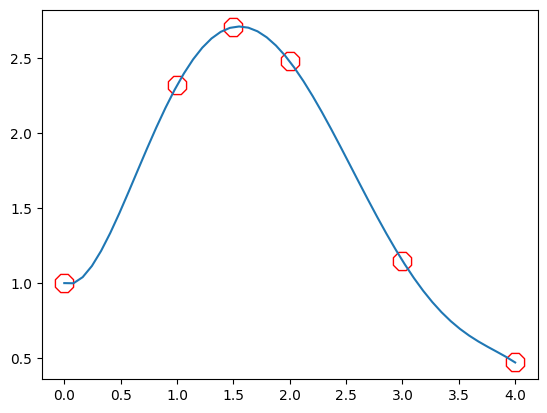

In [10]:
fig, ax = plt.subplots()
ax.plot(t,y)
ax.scatter(x_i,y_i,c='red',marker='8',fc='white',ec='red',s=200)


## Polynomios de Newton

Para un conjunto de datos con $n$ tuplas de nodos y valores $(x_i, y_i)$, el polinomio interpolador de grado $n-1$ de Newton está dado por 

$$N(x) = \sum_{i=0}^{n-1} a_i n_i (x)$$

donde $a_i$ son los coeficientes y $n_i(x)$ son los elementos de la base de polinomios de Newton. Estos últimos se encuentran por

$$n_i (x) = \prod_{k=0}^{i-1} (x-x_k)$$

donde además $n_0(x) = 1$. El reto en este caso es encontrar los coeficientes $a_i$. 

### Diferencias divididas

Los coeficientes $a_i$ de interpolación se definen a partir de las diferencias divididas. 

$$a_i := [y_0, ..., y_i]$$

Las diferencias divididas están definidas de manera recursiva de la siguiente manera:

$$[y_k] := y_k$$
$$[y_k,...,y_{k+j}] := \frac{[y_{k+1},...,y_{k+j}]-[y_{k},...,y_{k+j-1}]}{x_{k+j}-x_k}$$

Veamos algunos ejemplos para $k=0$:

$$[y_0] = y_0 $$
$$[y_0,y_1] = \frac{[y_1]-[y_0]}{x_1-x_0} = \frac{y_1-y_0}{x_1-x_0} $$
$$[y_0,y_1,y_2] = \frac{[y_1,y_2]-[y_0,y_1]}{x_2-x_0} = \frac{\frac{y_2-y_1}{x_2-x_1} - \frac{y_1-y_0}{x_1-x_0} }{x_2-x_0} $$

Observemos que estas diferencias se pueden simplifica si los nodos $x_i$ están igualmente espaciados: $h=x_{k+1}-x_k$. En cuyo caso, las diferencias son iguales a 

$$[y_0] = y_0 $$
$$[y_0,y_1] = \frac{1}{h} ([y_1]-[y_0]) = \frac{1}{h}(y_1-y_0)  $$
$$[y_0,y_1,y_2] = \frac{1}{2h} ([y_1,y_2]-[y_0,y_1]) = \frac{1}{2h^2} (y_2-y_1-y_1+y_0) $$


Para el caso en el que las diferencias son iguales, construyamos la matriz de diferencias.

In [36]:
x_i = [1,2,3,4,5]
y_i = [1,2.5,5,2.5,1]

In [37]:
diff_matrix = np.zeros((len(x_i),len(y_i)))
diff_matrix[:,0] = y_i

for i in range(1,len(x_i)):
    for j in range(i,len(x_i)):
        diff_matrix[j,i] = diff_matrix[j,i-1]-diff_matrix[j-1,i-1]

diff_matrix

array([[ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 2.5,  1.5,  0. ,  0. ,  0. ],
       [ 5. ,  2.5,  1. ,  0. ,  0. ],
       [ 2.5, -2.5, -5. , -6. ,  0. ],
       [ 1. , -1.5,  1. ,  6. , 12. ]])

In [38]:
def newton_basis(x: float, nodos: np.array, i: int):
    n_i = 1
    if i==0:
        return n_i
    else:
        for k in range(i):
            n_i *= (x-nodos[k])
    return n_i
            

In [39]:
def diff_matrix(nodos: np.array, valores: np.array):
    diff_matrix = np.zeros((len(nodos),len(valores)))
    diff_matrix[:,0] = valores

    for i in range(1,len(nodos)):
        for j in range(i,len(nodos)):
            diff_matrix[j,i] = diff_matrix[j,i-1]-diff_matrix[j-1,i-1]
    return diff_matrix


In [40]:
def newton_polynomial(nodos: np.array, valores: np.array, x: float):
    N = valores[0]
    ddiff = diff_matrix(nodos, valores)
    h = nodos[1]-nodos[0]

    for i in range(1,len(nodos)):
        N += newton_basis(x,nodos,i)*ddiff[i,i]/(np.math.factorial(i)*h**(i))

    return N
    

In [48]:
def funcion_real(t):
    w0 = 3
    g = 2
    A=5
    return A/((t-w0)**2+g**2/4)

In [61]:
t = np.linspace(0,6,100)
ynewton = newton_polynomial(x_i,y_i,t)
ylagrange = lagrange_polynomial(t,x_i,y_i)

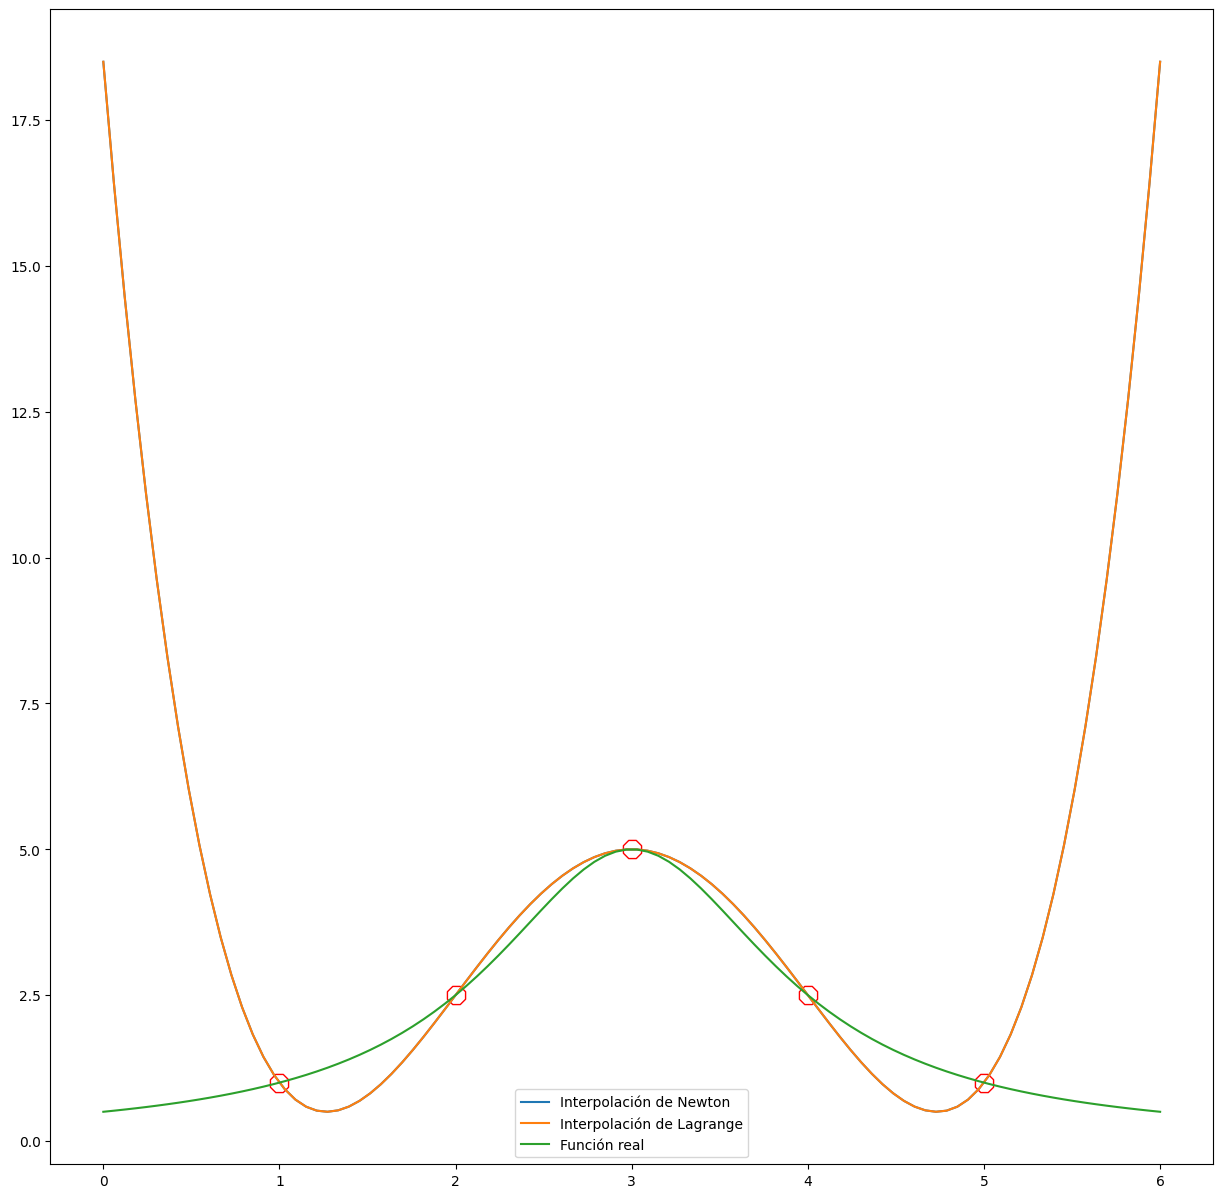

In [62]:
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(t,ynewton,label='Interpolación de Newton')
ax.plot(t,ylagrange,label='Interpolación de Lagrange')
ax.plot(t,funcion_real(t),label='Función real')
ax.scatter(x_i,y_i,ec='red',fc='white',s=200,marker='8')
ax.legend()

In [18]:
def polinomio(x: float):
    return 1+5*x+0.5*x**2-3*x**3+x**4-6*x**5

In [19]:
t = np.linspace(-1,1)

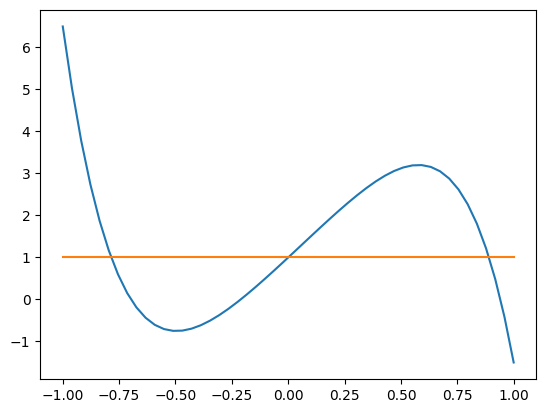

In [20]:
fig, ax = plt.subplots()
ax.plot(t,polinomio(t))
ax.plot(t,np.tile(1,len(t)))

In [21]:
def derivada_progresiva(f, t, h):
    return (f(t+h)-f(t))/h

In [27]:
def newton_rhapson(x_0, f, epsilon):
    x_n = x_0
    while np.abs(f(x_n)) > epsilon:
        x_n -= f(x_n)/derivada_progresiva(f,x_n,0.0001)
        print(x_n, f(x_n))

    return x_n

In [28]:
newton_rhapson(0,polinomio,10e-8)

-0.19999800122002784 0.04752871469274382
-0.21089829753311898 0.00037024197035674623
-0.210984555759212 5.185696943252674e-08


-0.210984555759212

In [30]:
newton_rhapson(-1,polinomio,10e-8)

-0.8333010649929042 1.8095764678617619
-0.7373431751183326 0.3910033789413506
-0.702111129116607 0.04099062019406052
-0.6974586217276099 0.0006433777160185228
-0.6973831837609388 -5.56731716283565e-08


-0.6973831837609388

In [31]:
newton_rhapson(1,polinomio,10e-8)

0.9482870081624416 -0.15950874290325334
0.9413514741864878 -0.0026076991071413147
0.9412343267589218 -1.3407161958411962e-06
0.9412342664955929 -3.177342833282637e-10


0.9412342664955929